## Installation and import blocks

In [ ]:
%pip install seaborn
%pip install matplotlib
%pip install pandas
%pip install numpy
%pip install pm4py

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pm4py
import math

## Data retrieving

In [10]:
# Retrieve the original events log from the provided .xes file [warning: do not use a celeron like me!]
original_event_log = pm4py.read_xes("../Assets/Road_Traffic_Fine_Management_Process.xes")

parsing log, completed traces :: 100%|██████████| 150370/150370 [01:37<00:00, 1548.97it/s]


In [11]:
# Printing the start and end activities of the event log
start_activities = pm4py.get_start_activities(original_event_log)
end_activities = pm4py.get_end_activities(original_event_log)
print("Start activities: {}\nEnd activities: {}".format(start_activities, end_activities))

Start activities: {'Create Fine': 150370}
End activities: {'Send Fine': 20755, 'Send for Credit Collection': 58997, 'Payment': 67201, 'Send Appeal to Prefecture': 3144, 'Appeal to Judge': 134, 'Notify Result Appeal to Offender': 86, 'Receive Result Appeal from Prefecture': 53}


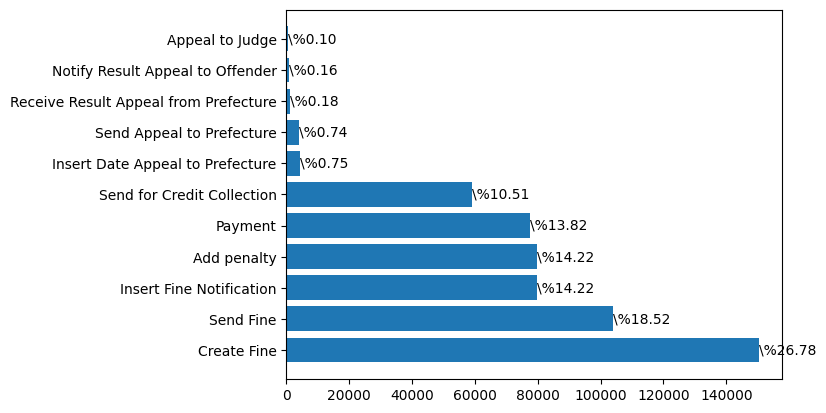

In [49]:
# Replacing the nan values with None for practice reason, not worth to remove the rows  because they are not many and the dataset will be ruined or useless
original_event_log.fillna("None", inplace=True)
activities_number = original_event_log.get("concept:name").value_counts()
bars = plt.barh(activities_number.index, activities_number.values)
plt.bar_label(bars, labels=['%' + '%.2f'%((x/original_event_log.get("concept:name").count())*100) for x in bars.datavalues])
plt.show()